In [3]:
import metnum
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, cohen_kappa_score, precision_score, confusion_matrix
from timeit import default_timer as timer

import os

!mkdir -p digitosError

In [4]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [5]:
alpha = 35
k = 3

df_train = pd.read_csv("../data/train.csv")
X = df_train[df_train.columns[1:]].values
y = df_train["label"].values.reshape(-1, 1)

limit = int(0.8 * X.shape[0]) 

X_train, y_train = X[:limit], y[:limit]
X_val, y_val = X[limit:], y[limit:]

In [6]:
pca= metnum.PCA(alpha)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

clf = metnum.KNNClassifier(k)
clf.fit(X_train_pca, y_train)

X_val_pca = pca.transform(X_val)
clf.load(X_val_pca)
y_pred = clf.predict(k)

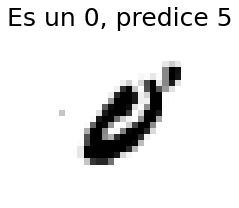

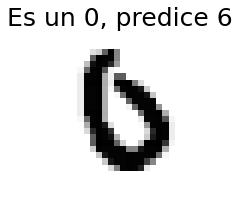

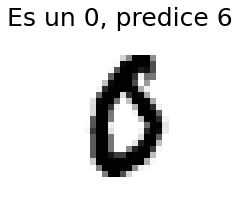

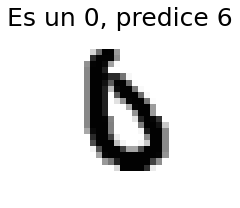

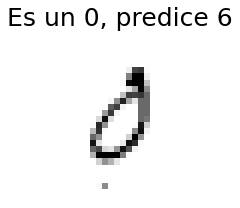

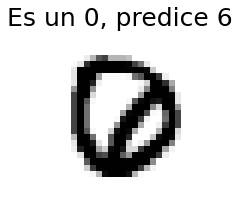

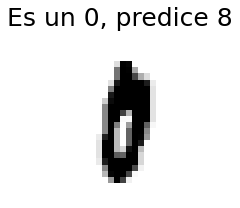

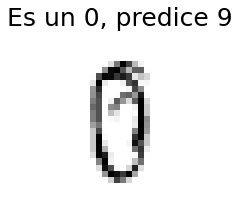

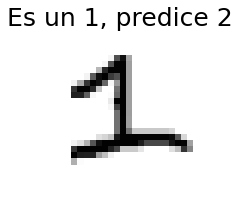

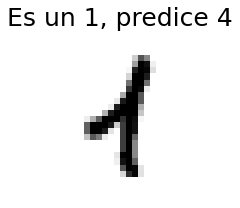

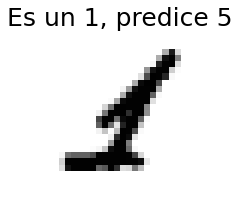

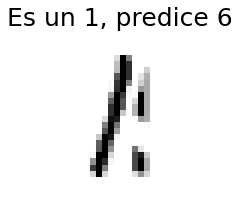

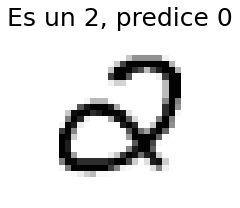

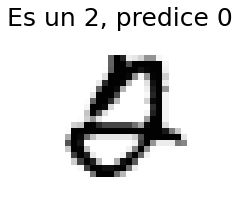

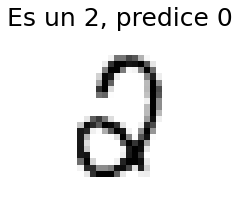

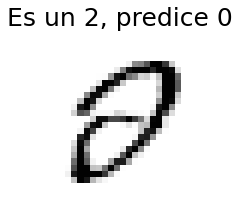

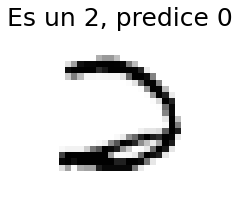

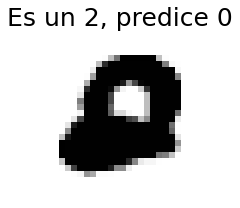

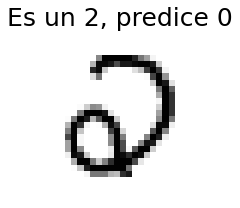

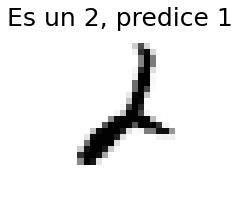

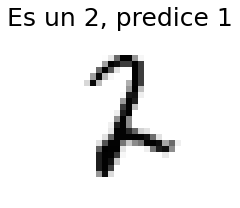

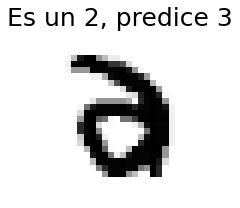

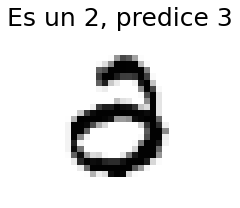

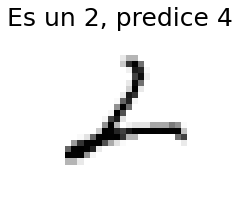

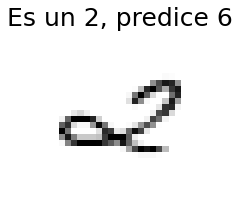

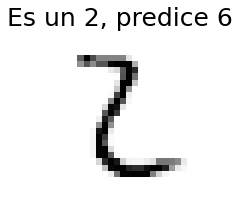

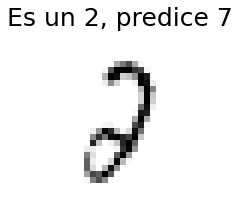

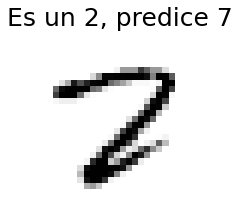

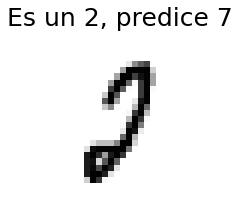

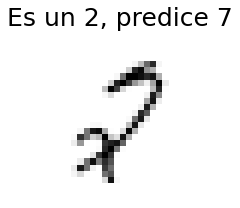

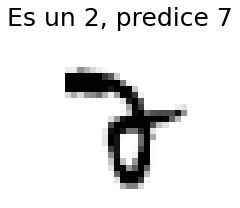

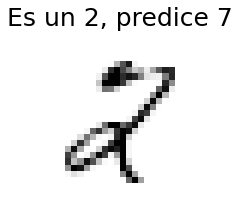

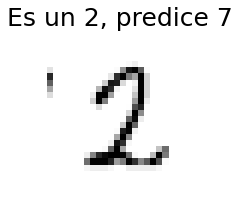

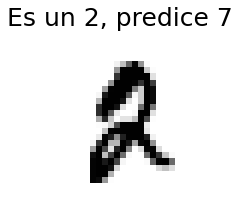

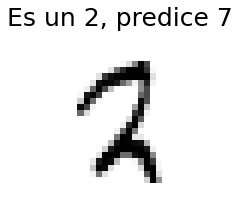

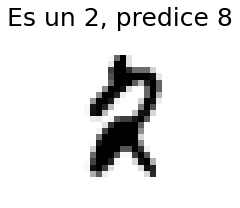

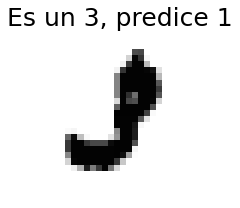

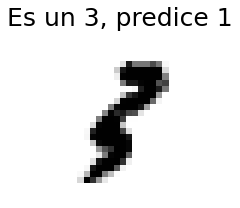

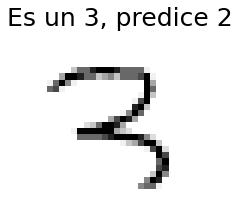

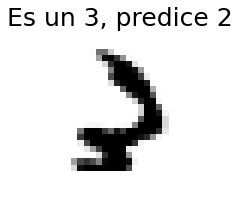

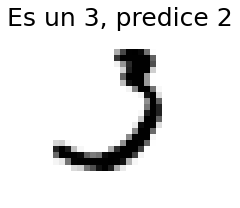

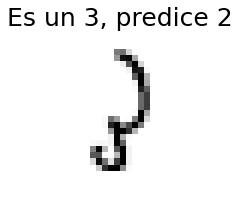

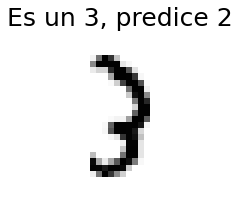

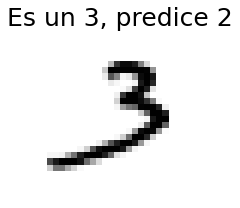

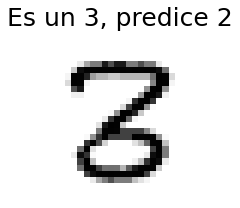

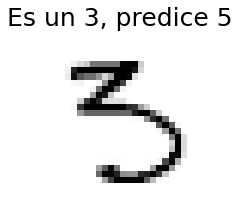

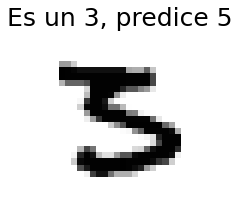

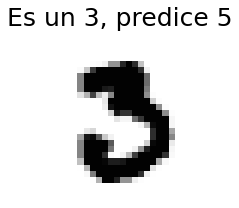

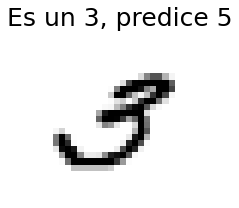

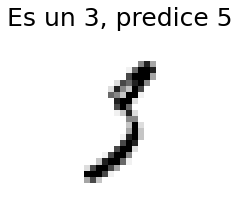

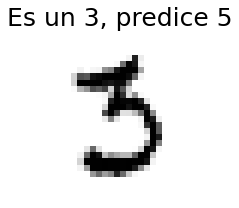

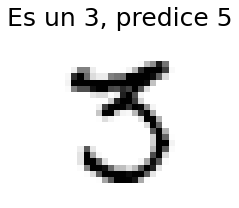

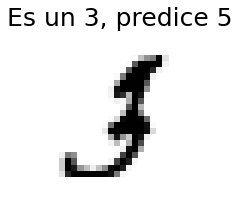

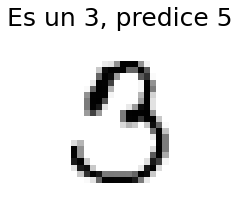

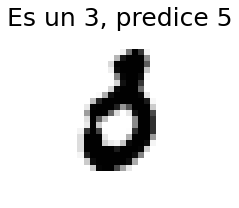

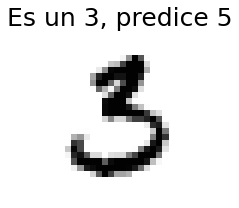

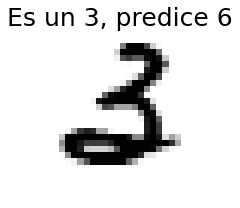

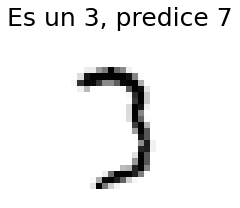

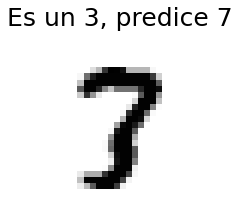

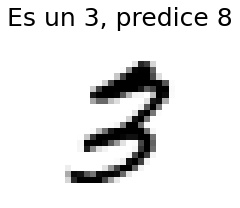

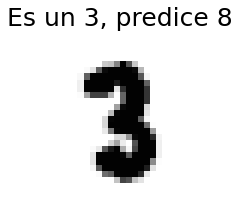

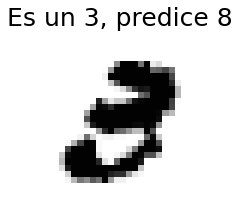

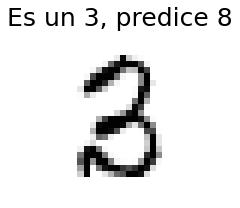

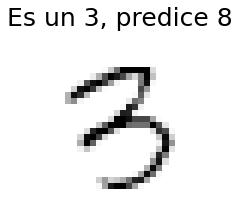

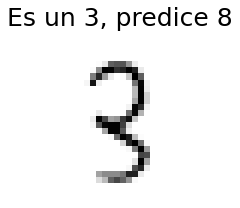

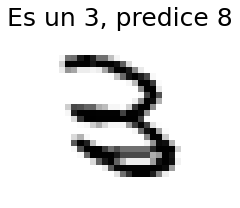

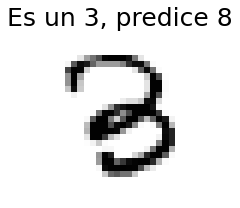

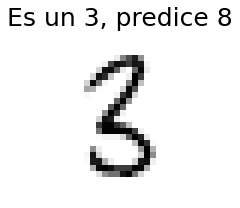

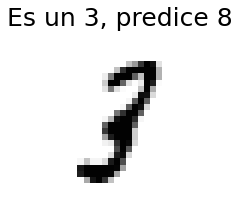

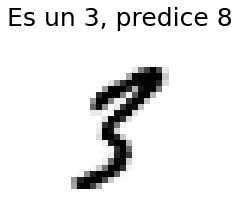

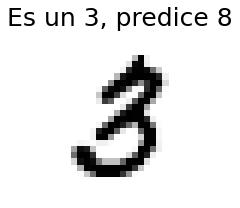

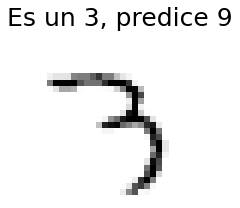

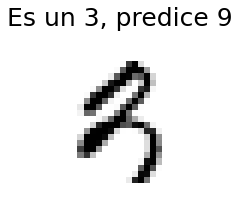

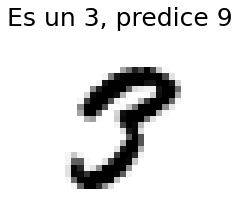

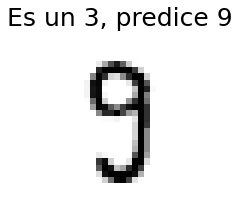

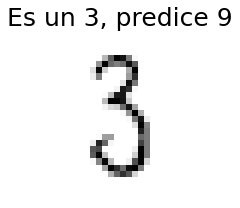

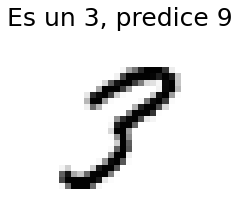

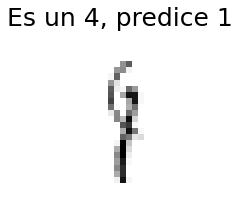

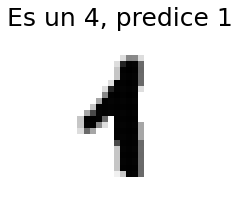

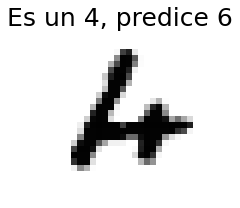

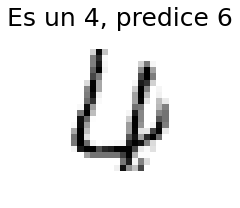

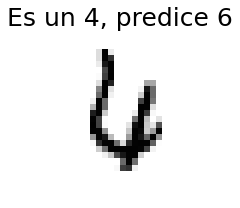

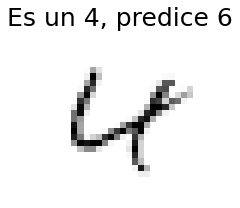

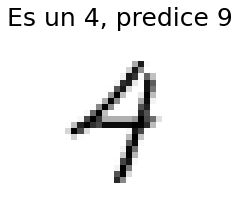

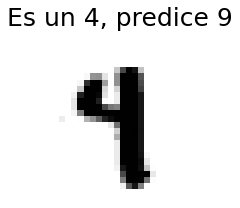

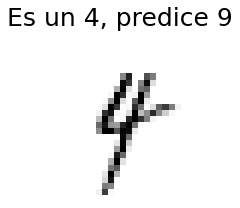

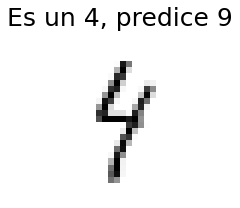

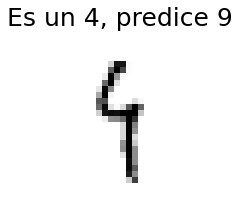

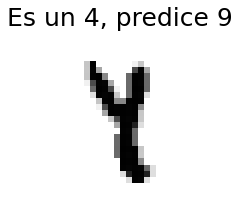

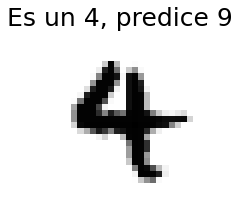

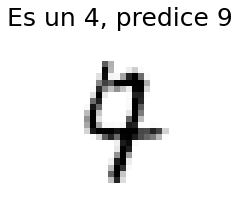

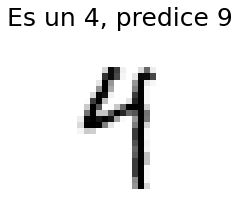

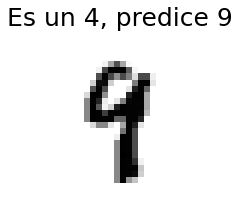

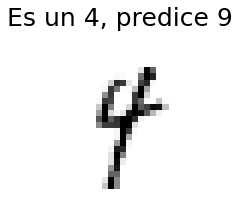

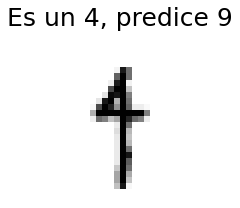

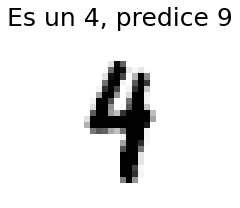

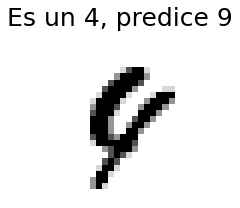

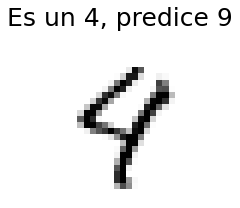

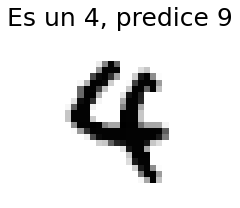

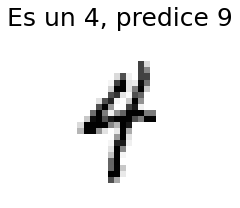

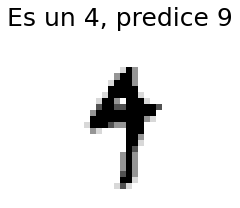

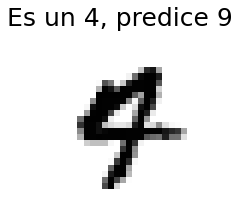

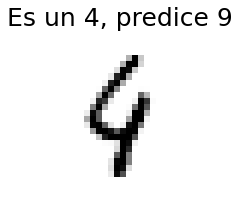

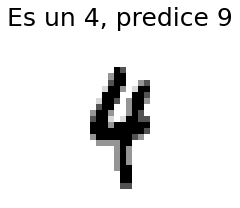

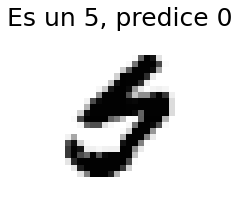

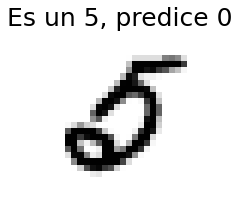

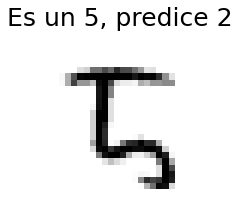

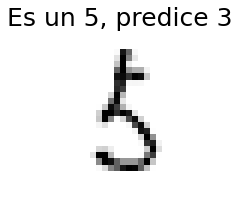

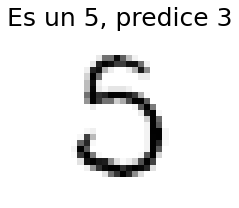

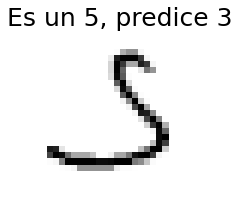

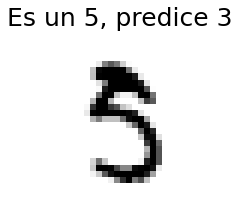

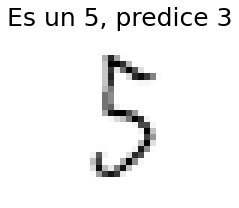

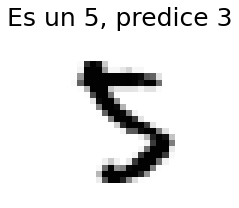

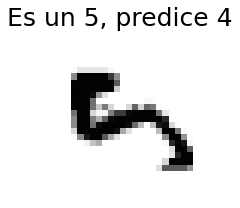

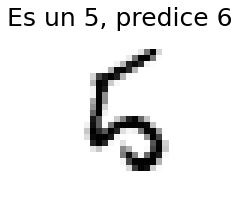

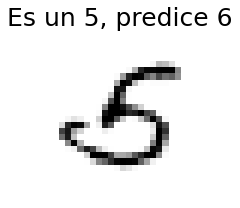

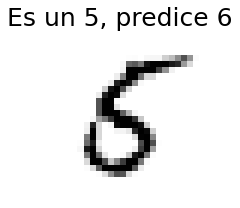

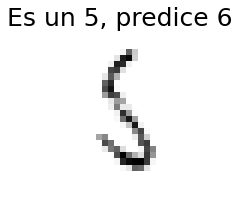

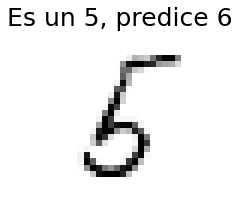

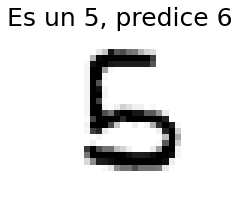

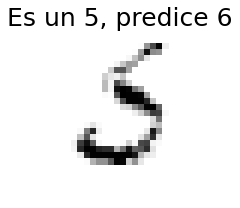

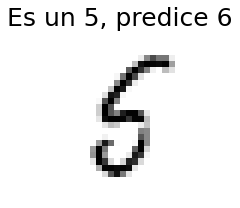

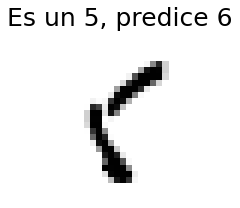

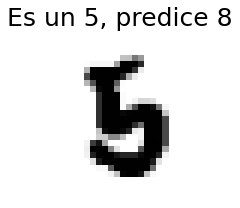

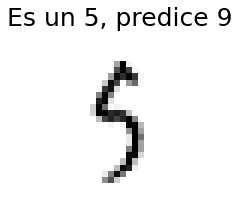

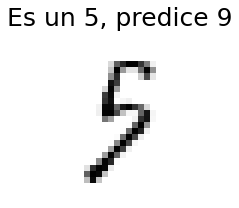

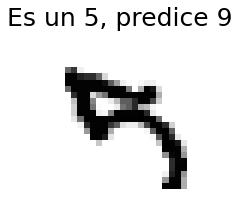

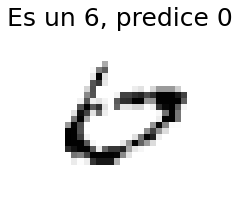

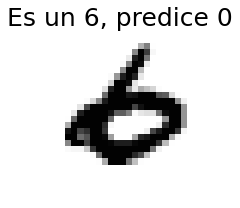

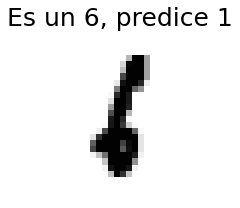

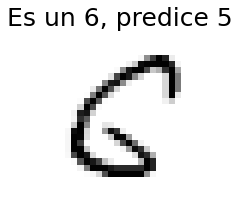

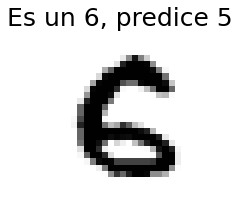

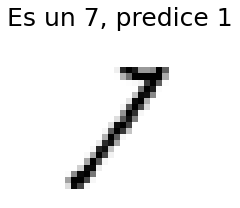

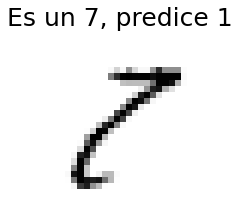

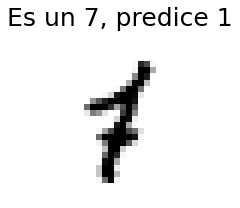

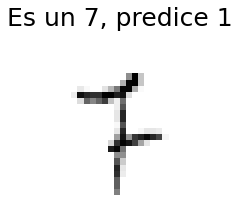

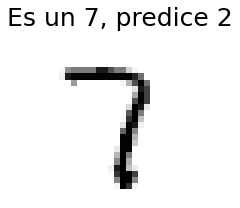

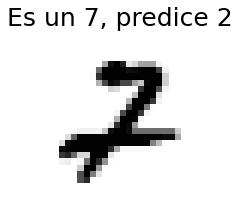

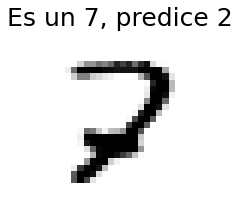

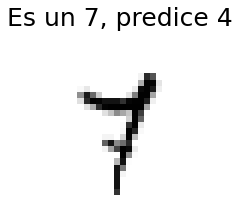

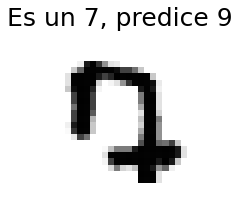

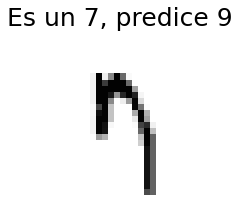

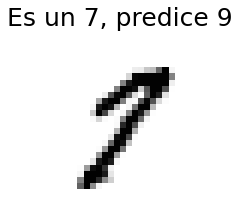

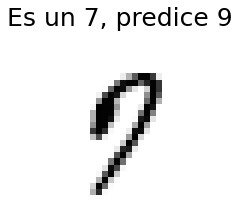

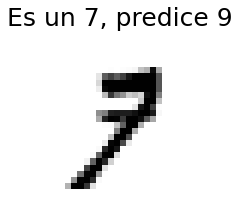

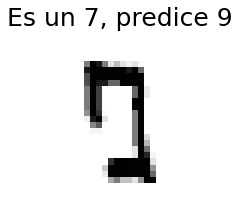

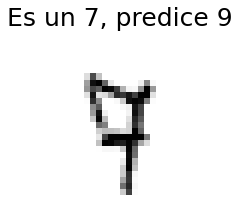

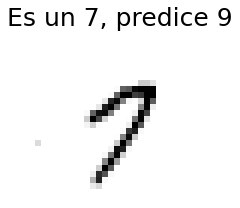

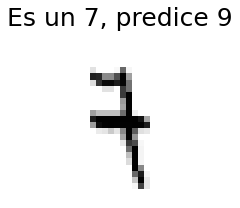

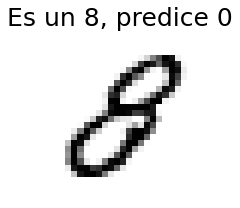

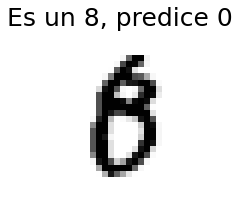

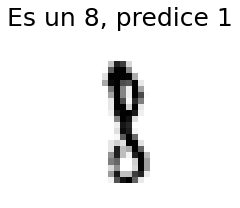

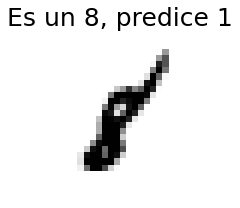

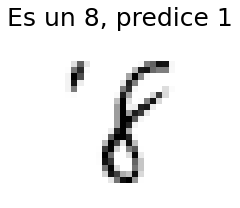

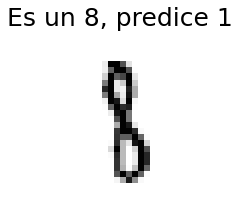

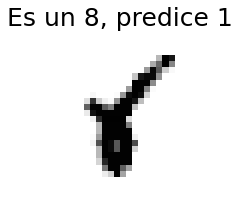

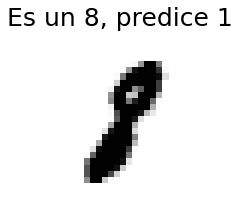

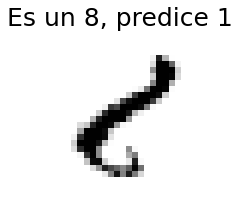

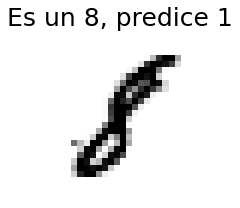

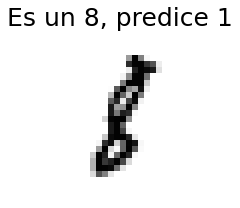

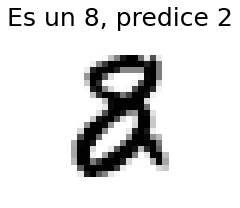

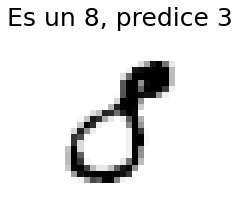

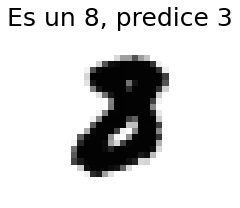

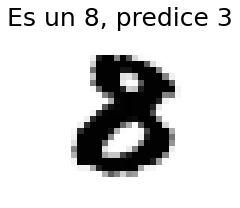

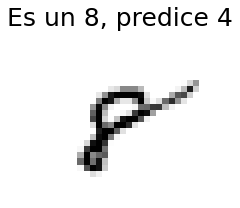

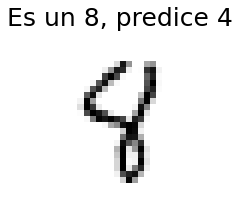

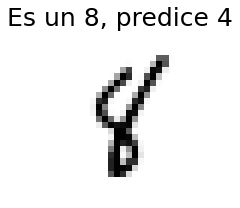

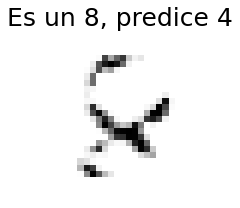

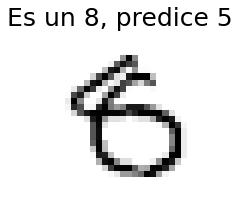

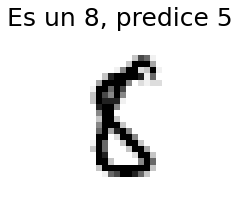

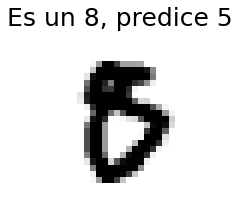

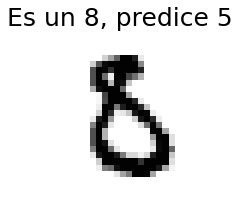

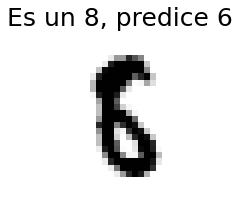

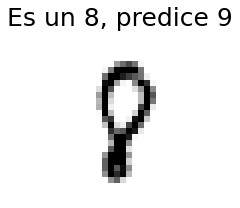

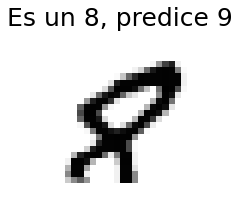

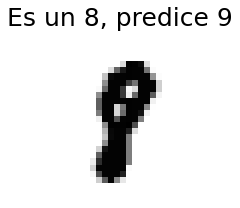

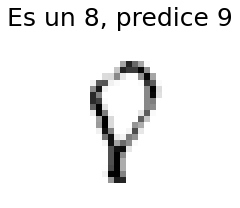

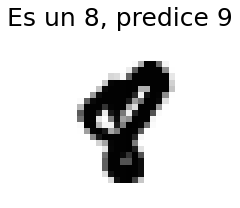

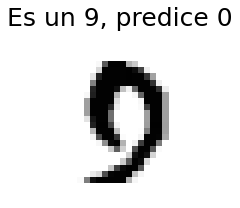

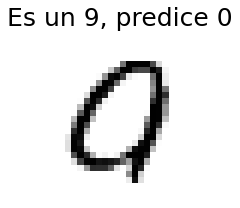

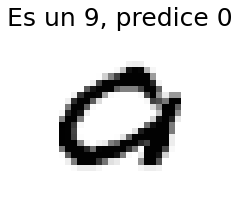

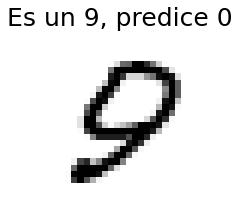

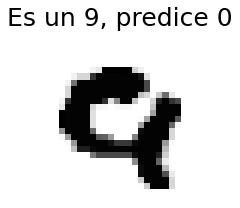

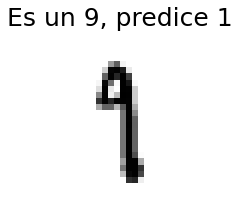

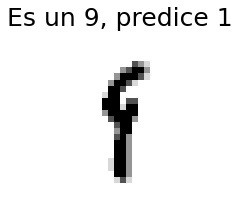

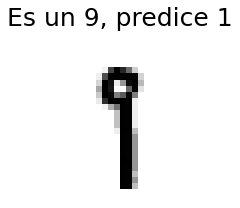

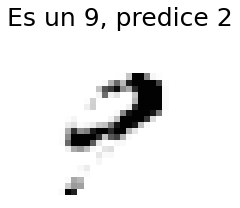

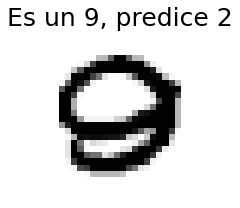

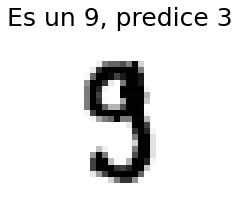

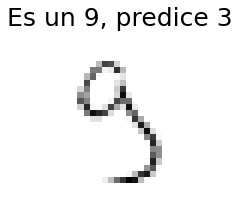

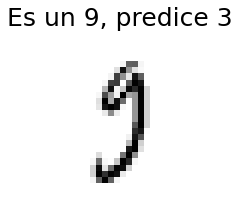

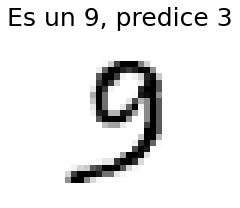

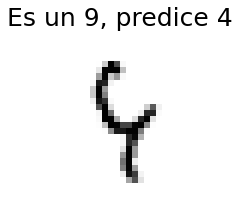

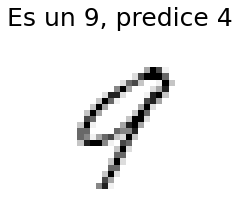

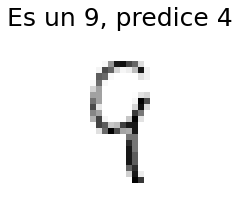

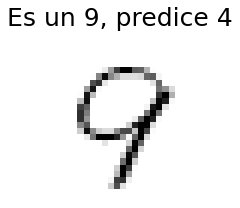

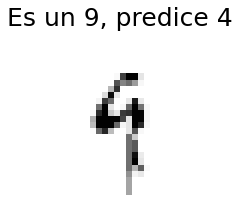

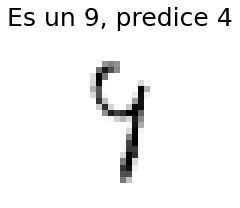

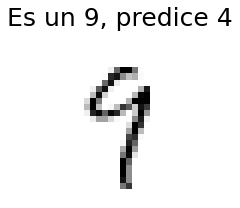

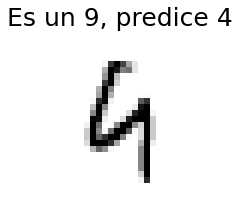

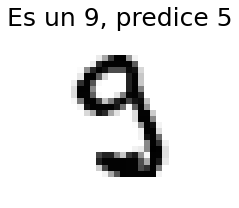

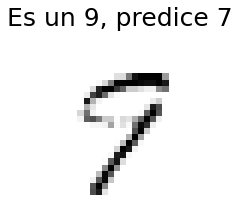

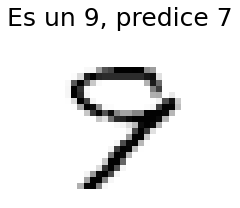

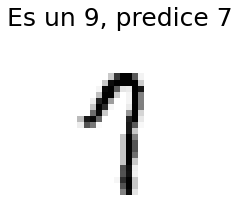

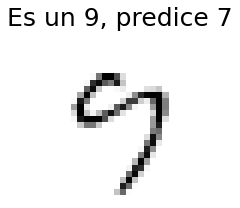

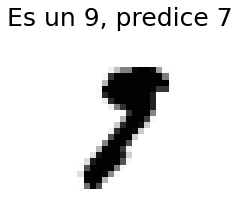

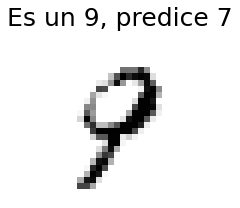

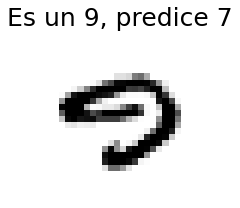

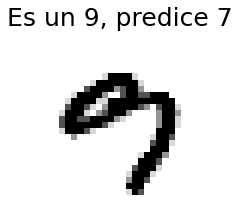

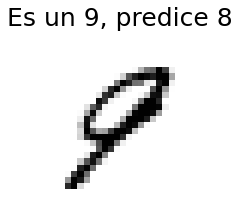

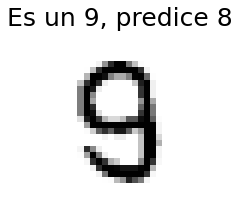

In [39]:
for truth in range(10):
    path = f"digitosError/truth_{truth}"
    os.makedirs(path, exist_ok=True)
    
    for pr in range(10):
        if truth==pr:
            continue
        
        indices = [i for i in range(len(y_val)) if y_val[i] == truth and  pr == y_pred[i]]
        for ix, i in enumerate(indices):
            img = X_val[i].reshape(28, 28)
            plt.figure(figsize=(4,3))
            plt.imshow(img, cmap="Greys")
            plt.title(f"Es un {truth}, predice {pr}", fontsize=25)
            plt.axis('off')
            plt.tight_layout()
            
            plt.savefig(f"{path}/es{truth}_pred{pr}_{ix}")
            plt.show()

# Manuscritos

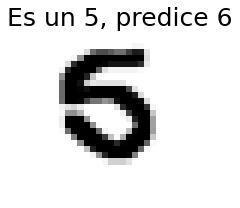

In [17]:
img = pd.read_csv('img.csv')
truth = 5
pr = 6

plt.figure(figsize=(4,3))
plt.imshow(img, cmap="Greys")
plt.title(f"Es un {truth}, predice {pr}", fontsize=25)
plt.axis('off')
plt.tight_layout()

plt.savefig(f"digitosError/aMano_es{truth}_pred{pr}")
plt.show()